In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [2]:
df_clf = pd.read_csv('./data/df_clf.csv')
df_clf.head()

,Unnamed: 0,id,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay,XE,...,DL,9E,MQ,YV,US,EV,B6,OH,HA,F9
0,0,400740,3036,135.0,54.0,4.0,1195,131.0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,194808,315,79.0,207.0,7.0,707,145.0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,2,526903,6673,253.0,194.0,5.0,499,42.0,1,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,3,477937,3668,217.0,207.0,2.0,810,70.0,1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,4,48180,623,153.0,214.0,5.0,985,143.0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
df_reg = pd.read_csv("./data/df_reg.csv")
df_reg.head()

,Unnamed: 0,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,...,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint
0,0,11-01-2016 17:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,...,18.2,48.900000,17.033333,45.53,6.60,733.5,92.0,7.000000,63.000000,5.3
1,1,11-01-2016 17:10,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,...,18.2,48.863333,17.066667,45.56,6.48,733.6,92.0,6.666667,59.166667,5.2
2,2,11-01-2016 17:20,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,...,18.2,48.730000,17.000000,45.50,6.37,733.7,92.0,6.333333,55.333333,5.1
3,3,11-01-2016 17:30,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,...,18.1,48.590000,17.000000,45.40,6.25,733.8,92.0,6.000000,51.500000,5.0
4,4,11-01-2016 17:40,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,...,18.1,48.590000,17.000000,45.40,6.13,733.9,92.0,5.666667,47.666667,4.9


In [4]:
df_reg.drop(['Unnamed: 0', 'date'], axis=1, inplace=True)

In [5]:
df_clf.drop(['Unnamed: 0'], axis=1, inplace=True)

# Построение моделей

### DecisionTreeClassifier

In [6]:
X_clf = df_clf.drop(['Delay'], axis=1)
y_clf = df_clf['Delay']

In [7]:
from sklearn.model_selection import train_test_split

X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(X_clf, y_clf, test_size=0.2, random_state=42)

In [11]:
params = {'max_depth': range(1, 11),
               "min_samples_split": range(2, 20),
         "criterion" : ["gini", "entropy", "log_loss"]}

In [33]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier

clf = RandomizedSearchCV(DecisionTreeClassifier(random_state=42), params).fit(X_train_clf, y_train_clf)

In [34]:
clf.best_params_

{'min_samples_split': 8, 'max_depth': 10, 'criterion': 'gini'}

In [35]:
clf.best_score_

0.8106309679246173

In [36]:
y_pred = clf.predict(X_test_clf)
y_prob = clf.predict_proba(X_test_clf)[:, 1]

In [37]:
from sklearn.metrics import classification_report, roc_auc_score
print(classification_report(y_test_clf, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.89      0.88     59563
           1       0.64      0.57      0.60     19899

    accuracy                           0.81     79462
   macro avg       0.75      0.73      0.74     79462
weighted avg       0.80      0.81      0.81     79462



In [39]:
roc_auc_score(y_test_clf, y_prob)

0.8852346421689155

In [59]:
clf = DecisionTreeClassifier(max_depth=4, min_samples_split=13,
                             criterion="gini", random_state=42).fit(X_train_clf, y_train_clf)

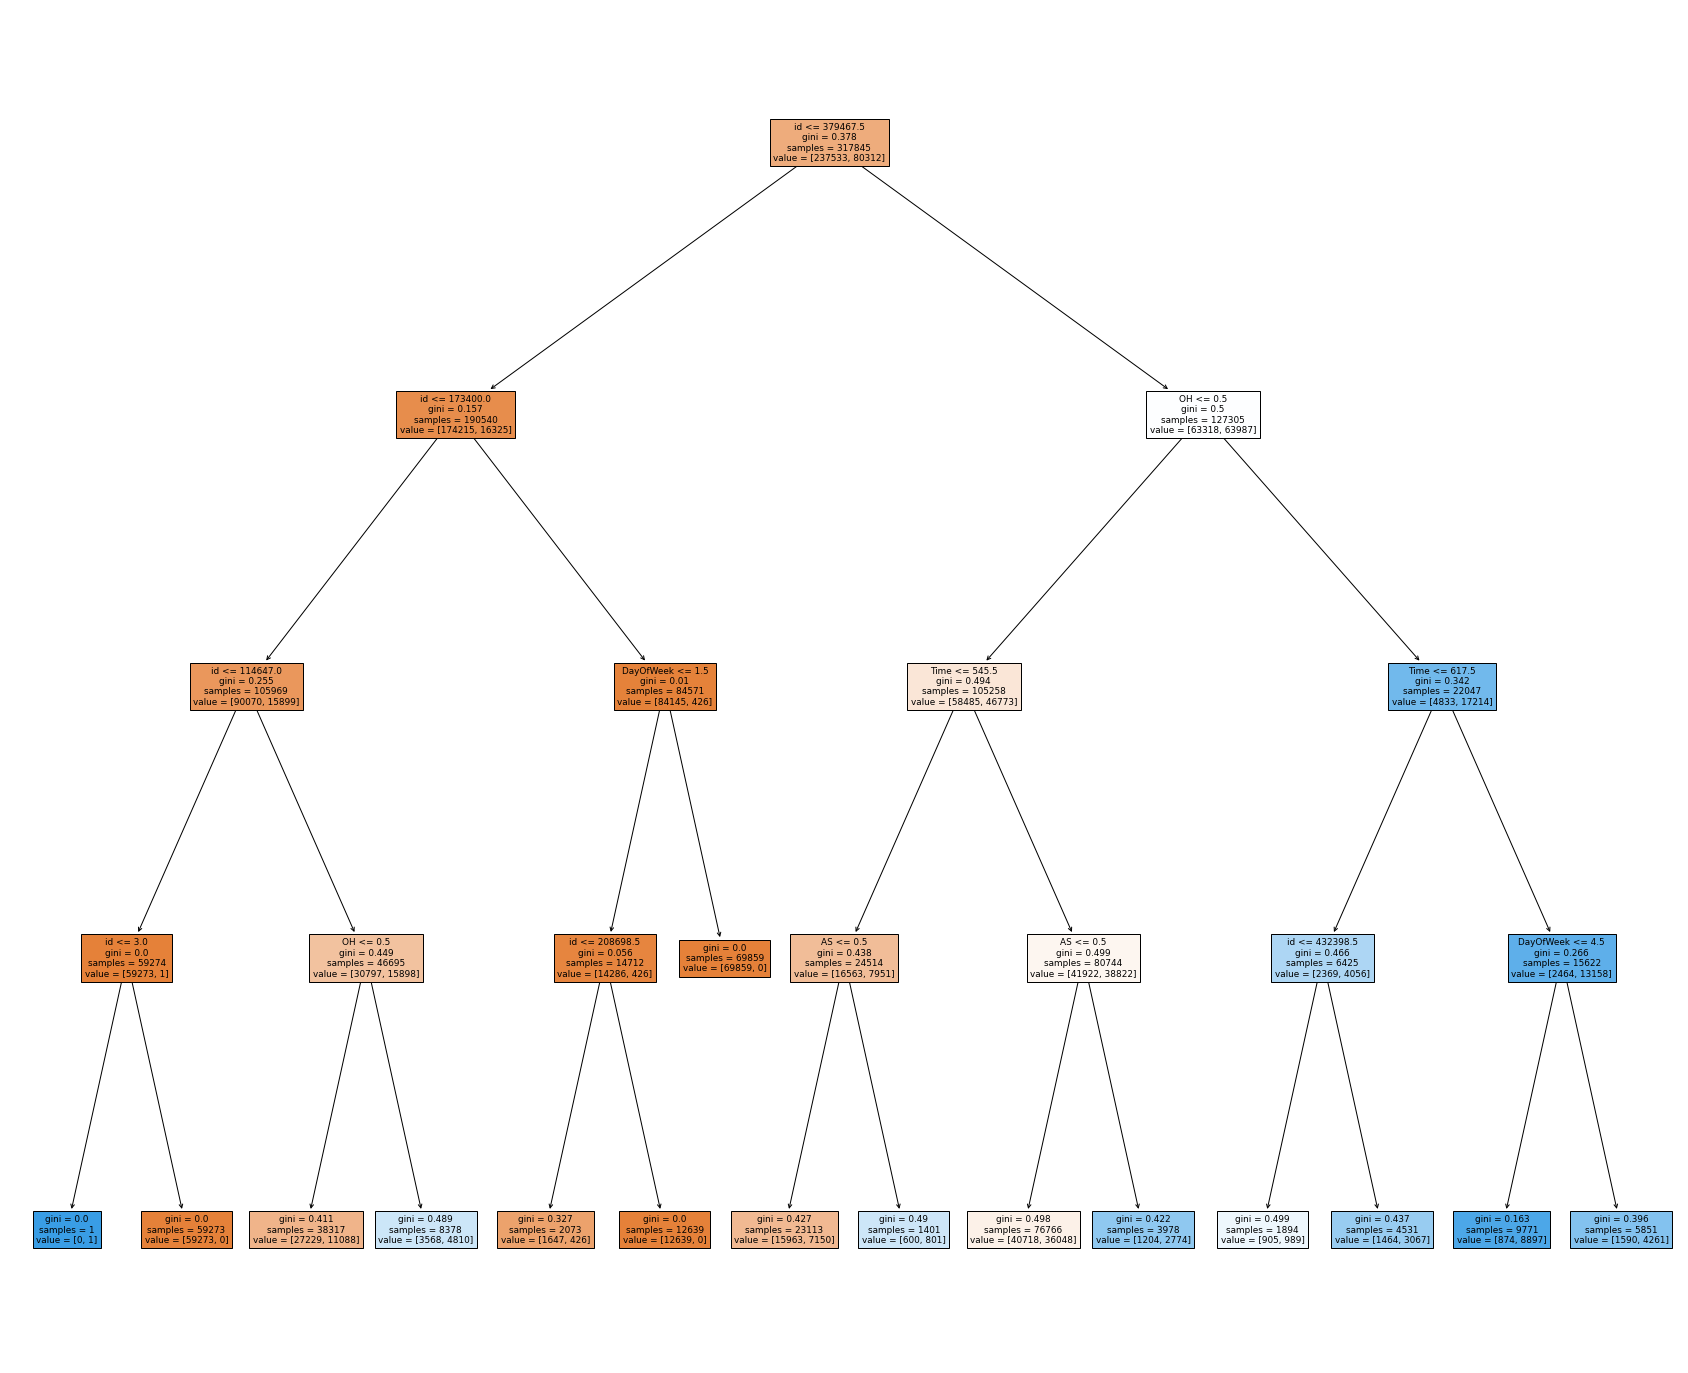

In [60]:
from sklearn.tree import plot_tree
fig = plt.figure(figsize=(30,25))
DT_plot = plot_tree(clf, feature_names=X_train_clf.columns, filled=True)

In [23]:
from pycaret.classification import *

In [24]:
setup(data=df_clf,  target='Delay', session_id=555, train_size=0.7, preprocess=True)

,Description,Value
0,Session id,555
1,Target,Delay
2,Target type,Binary
3,Original data shape,"(397307, 26)"
4,Transformed data shape,"(397307, 26)"
5,Transformed train set shape,"(278114, 26)"
6,Transformed test set shape,"(119193, 26)"
7,Numeric features,25
8,Preprocess,True
9,Imputation type,simple


In [25]:
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


In [26]:
dt = create_model(estimator='dt')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7888,0.7198,0.5805,0.5815,0.5810,0.4399,0.4399
1,0.7883,0.7195,0.5808,0.5803,0.5805,0.4389,0.4389
2,0.7879,0.7237,0.5942,0.5772,0.5856,0.4430,0.4431
3,0.7866,0.7173,0.5775,0.5770,0.5772,0.4345,0.4345
4,0.7886,0.7201,0.5819,0.5809,0.5814,0.4400,0.4400
5,0.7842,0.7160,0.5785,0.5713,0.5749,0.4303,0.4303
6,0.7847,0.7170,0.5803,0.5722,0.5762,0.4319,0.4319
7,0.7850,0.7161,0.5770,0.5733,0.5751,0.4312,0.4312
8,0.7881,0.7222,0.5891,0.5785,0.5838,0.4417,0.4417


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [27]:
tuned_dt = tune_model(dt)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8077,0.8794,0.4907,0.6596,0.5627,0.4429,0.4508
1,0.8084,0.8800,0.4868,0.6639,0.5617,0.4428,0.4515
2,0.8093,0.8805,0.4835,0.6688,0.5613,0.4435,0.4530
3,0.8061,0.8780,0.4830,0.6572,0.5568,0.4363,0.4448
4,0.8073,0.8812,0.4888,0.6590,0.5613,0.4413,0.4494
5,0.8063,0.8796,0.4948,0.6532,0.5631,0.4417,0.4487
6,0.8105,0.8822,0.4978,0.6664,0.5699,0.4516,0.4595
7,0.8063,0.8786,0.4885,0.6556,0.5598,0.4390,0.4468
8,0.8062,0.8795,0.4472,0.6746,0.5379,0.4216,0.4358


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


### DecisionTreeRegressor

In [41]:
params = {'max_depth': range(1, 11),
               "min_samples_split": range(2, 20),
         "criterion" : ["squared_error", "friedman_mse", "absolute_error", "poisson"],}

In [13]:
X_reg = df_reg.drop(['Appliances'], axis=1)
y_reg = df_reg['Appliances']

In [14]:
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2)

In [42]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeRegressor

reg = RandomizedSearchCV(DecisionTreeRegressor(random_state=42), params).fit(X_train_reg, y_train_reg)

In [43]:
reg.best_params_

{'min_samples_split': 17, 'max_depth': 8, 'criterion': 'friedman_mse'}

In [44]:
reg.best_score_

0.1649220886328826

In [45]:
y_pred = reg.predict(X_test_reg)

In [46]:
MSE_test = round(np.mean(np.square(y_test_reg - y_pred)),2)
MSE_test

9225.29

In [94]:
reg = DecisionTreeRegressor(max_depth=4, min_samples_split=4,
                             criterion="poisson", random_state=42).fit(X_train_reg, y_train_reg)

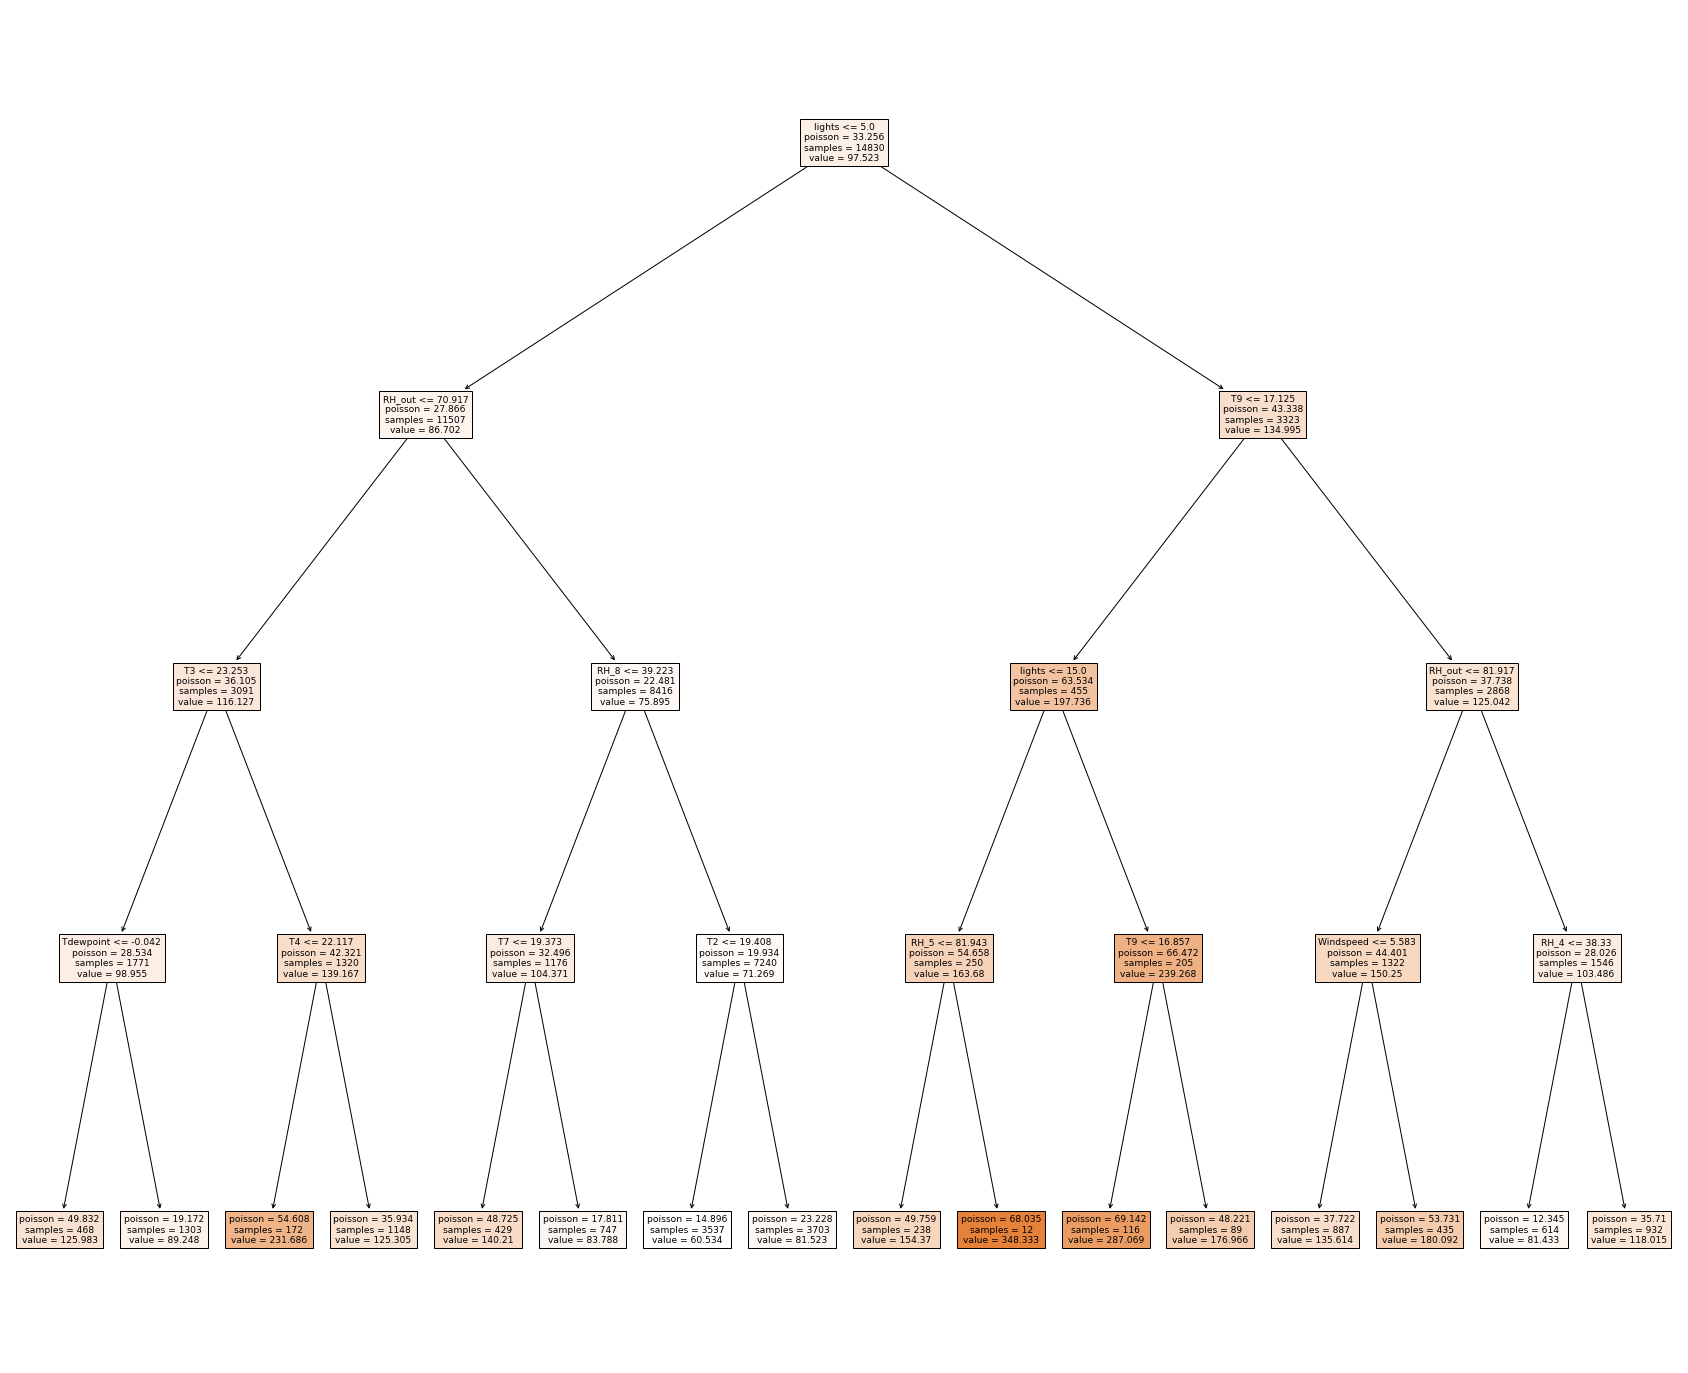

In [96]:
from sklearn.tree import plot_tree
fig = plt.figure(figsize=(30,25))
DT_plot = plot_tree(reg, feature_names=X_train_reg.columns, filled=True)

In [28]:
from pycaret.regression import *

In [29]:
setup(data=df_reg,  target='Appliances', ignore_features=['date'], session_id=555, train_size=0.7, preprocess=True)

,Description,Value
0,Session id,555
1,Target,Appliances
2,Target type,Regression
3,Original data shape,"(18538, 27)"
4,Transformed data shape,"(18538, 26)"
5,Transformed train set shape,"(12976, 26)"
6,Transformed test set shape,"(5562, 26)"
7,Ignore features,1
8,Numeric features,25
9,Preprocess,True


In [30]:
models()

,Name,Reference,Turbo
ID,,,
lr,Linear Regression,sklearn.linear_model._base.LinearRegression,True
lasso,Lasso Regression,sklearn.linear_model._coordinate_descent.Lasso,True
ridge,Ridge Regression,sklearn.linear_model._ridge.Ridge,True
en,Elastic Net,sklearn.linear_model._coordinate_descent.Elast...,True
lar,Least Angle Regression,sklearn.linear_model._least_angle.Lars,True
llar,Lasso Least Angle Regression,sklearn.linear_model._least_angle.LassoLars,True
omp,Orthogonal Matching Pursuit,sklearn.linear_model._omp.OrthogonalMatchingPu...,True
br,Bayesian Ridge,sklearn.linear_model._bayes.BayesianRidge,True
ard,Automatic Relevance Determination,sklearn.linear_model._bayes.ARDRegression,False


In [31]:
dt_reg = create_model(estimator='dt')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,37.7735,8745.0693,93.5151,0.0490,0.5167,0.3560
1,42.9738,10129.4299,100.6451,0.0671,0.5164,0.4005
2,44.0524,10332.8197,101.6505,0.0396,0.5343,0.4104
3,41.2481,9444.3760,97.1822,0.1004,0.5300,0.4111
4,39.6456,8634.0524,92.9196,0.1259,0.5223,0.3916
5,39.8074,9800.6934,98.9985,-0.0273,0.4975,0.3585
6,48.2652,12784.2714,113.0676,-0.0020,0.5642,0.4094
7,45.7672,11412.9530,106.8314,-0.1104,0.5531,0.4499
8,47.5867,11425.7517,106.8913,-0.0049,0.5803,0.4717


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [32]:
tuned_dt_reg = tune_model(dt_reg)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,43.0496,8135.5870,90.1975,0.1153,0.5477,0.4344
1,44.7038,8522.3059,92.3163,0.2151,0.5338,0.4528
2,43.8969,7904.0769,88.9049,0.2654,0.5375,0.4510
3,42.8691,7706.1796,87.7848,0.2660,0.5344,0.4673
4,44.5321,8628.7383,92.8910,0.1264,0.5323,0.4567
5,43.4879,7951.5413,89.1714,0.1665,0.5227,0.4378
6,47.1460,10554.0520,102.7329,0.1728,0.5581,0.4250
7,46.6958,8556.8092,92.5030,0.1675,0.5662,0.4925
8,47.8748,9018.6554,94.9666,0.2068,0.5529,0.4749


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


## Реализация дерева ручками 

In [36]:
from collections import Counter

class Node:
        def __init__(self, feature=None, split=None, value=None, left=None, right=None):
            self.feature = feature
            self.split = split
            self.value = value
            self.left = left
            self.right = right

class Tree:
    def __init__(self, max_depth=3, min_samples_split=2, task="clf"):
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.task = task
        self.node = Node()
        
    def fit(self, X, y):
        self.tree = self.tree_build(X, y)
    
    def predict(self, X):
        return np.array([self.choose_value(x, self.node) for x in X])
    
    def tree_build(self, X, y, depth=0):       
        count_samples, count_features = X.shape
        count_classes = len(np.unique(y))
        
        if count_samples < self.min_samples_split or depth >= self.max_depth or count_classes == 1:
            if self.task == "clf":
                self.node.value = np.argmax(np.bincount(y))
            else:
                self.node.value = np.mean(y)
        
        best_feature, best_split = self.split_tree(X, y, count_samples, count_features, count_classes)
        
        if best_feature is None or best_split is None:
            return node
        
        left_split = np.where(X[:, best_feature] <= best_split)[0]
        right_split = np.where(X[:, best_feature] > best_split)[0]
        
        self.node.feature = best_feature
        self.node.split = best_split
        
        self.node.left = self.tree_build(X[left_split], y[left_split], depth + 1)
        self.node.right = self.tree_build(X[right_split], y[right_split], depth + 1)
        
        return node
    
    def split_tree(self, X, y, count_samples, count_features, count_classes):
        best_gini = 0
        best_feature = None
        best_split = None
        
        for feature in range(count_features):
            #print(X[:, feature])
            unique_feature = np.unique(X[:, feature])
            if len(unique_feature) > count_samples * 0.5:
                unique_feature = np.unique(np.round(unique_feature, 2))
                
            for split in unique_feature:
                if self.task == "clf":
                    gini = self.count_gini_clf(X, y, feature, split)
                if self.task == "reg":
                    gini = self.count_gini_reg(X, y, feature, split)
                    
                if gini > best_gini:
                    best_feature = feature
                    best_split = split
                    
        return best_feature, best_split
    
    def count_gini_clf(self, X, y, feature, split):
        left_split = np.where(X[:, feature] <= split)[0]
        right_split = np.where(X[:, feature] > split)[0]
        
        y_right = y[right_split]
        y_left = y[left_split]
        
        class_counts = Counter(y_right)
        probabilities = np.array(list(class_counts.values())) / len(y_right)
        y_right_gini = -np.sum(probabilities * np.log2(probabilities))
        
        class_counts = Counter(y_left)
        probabilities = np.array(list(class_counts.values())) / len(y_left)
        y_left_gini = -np.sum(probabilities * np.log2(probabilities))
        
        return len(y_left) / len(y) * y_left_gini + len(y_right) / len(y) * y_right_gini
    
    def count_gini_reg(self, X, y, feature, split):
        left_split = np.where(X[:, feature] <= split)[0]
        right_split = np.where(X[:, feature] > split)[0]
        
        y_right = y[right_split]
        y_left = y[left_split]
        
        mean = np.mean(y_left)
        mse_left = np.mean((y_left - mean) ** 2)
        
        mean = np.mean(y_right)
        mse_right = np.mean((y_right - mean) ** 2)
        
        return len(y_left) / len(y) * mse_left + len(y_right) / len(y) * mse_right
    
    def choose_value(self, x, node):
        if node.value is not None:
            return node.value

        if x[node.feature_idx] <= node.threshold:
            return self.choose_value(x, node.left)
        else:
            return self.choose_value(x, node.right)

In [ ]:
tree = Tree()
tree.fit(np.array(X_test_clf), np.array(y_test_clf))

In [ ]:
y_pred = tree.predict(X_test_clf)

In [8]:
class CART:
    def __init__(self, max_depth=None, min_samples_split=2, classification=False):
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.classification = classification

    class Node:
        def __init__(self, feature=None, threshold=None, value=None, left=None, right=None):
            self.feature = feature
            self.threshold = threshold
            self.value = value
            self.left = left
            self.right = right

    def split_dataset(self, X, y, feature, threshold):
        left_indices = np.where(X[:, feature] <= threshold)[0]
        right_indices = np.where(X[:, feature] > threshold)[0]
        return X[left_indices], y[left_indices], X[right_indices], y[right_indices]

    def entropy(self, y):
        class_counts = Counter(y)
        probabilities = np.array(list(class_counts.values())) / len(y)
        return -np.sum(probabilities * np.log2(probabilities))

    def mean_squared_error(self, y):
        return np.mean((y - np.mean(y))**2)

    def find_best_split(self, X, y):
        best_feature, best_threshold, best_score = None, None, float('inf')
        n_features = X.shape[1]
        for feature in range(n_features):
            thresholds = np.unique(X[:, feature])
            for threshold in thresholds:
                if self.classification:
                    X_left, y_left, X_right, y_right = self.split_dataset(X, y, feature, threshold)
                    score = len(y_left) * self.entropy(y_left) + len(y_right) * self.entropy(y_right)
                else:
                    X_left, y_left, X_right, y_right = self.split_dataset(X, y, feature, threshold)
                    score = len(y_left) * self.mean_squared_error(y_left) + len(y_right) * self.mean_squared_error(y_right)
                if score < best_score:
                    best_feature, best_threshold, best_score = feature, threshold, score
        return best_feature, best_threshold

    def majority_vote(self, y):
        class_counts = Counter(y)
        return class_counts.most_common(1)[0][0]

    def build_tree(self, X, y, depth=0):
        if depth == self.max_depth or len(X) < self.min_samples_split:
            if self.classification:
                return self.Node(value=self.majority_vote(y))
            else:
                return self.Node(value=np.mean(y))

        feature, threshold = self.find_best_split(X, y)
        X_left, y_left, X_right, y_right = self.split_dataset(X, y, feature, threshold)
        left_child = self.build_tree(X_left, y_left, depth + 1)
        right_child = self.build_tree(X_right, y_right, depth + 1)

        return self.Node(feature=feature, threshold=threshold, left=left_child, right=right_child)

    def fit(self, X, y):
        if self.classification:
            self.classes_ = np.unique(y)
            self.n_classes_ = len(self.classes_)

        self.tree_ = self.build_tree(X, y)

    def predict_single(self, x, node):
        if node.feature is None:
            return node.value
        if x[node.feature] <= node.threshold:
            return self.predict_single(x, node.left)
        else:
            return self.predict_single(x, node.right)

    def predict(self, X):
        y_pred = np.zeros(len(X), dtype=int if self.classification else float)

        for i in range(len(X)):
            y_pred[i] = self.predict_single(X[i], self.tree_)

        return y_pred

In [ ]:
cart = CART().fit(np.array(X_test_clf), np.array(y_test_clf))

C:\Users\Кирилл\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Кирилл\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [ ]:
y_pred = cart.predict(X_test_clf)

### BaggingClassifier

In [50]:
from sklearn.ensemble import BaggingClassifier

bag_clf = BaggingClassifier(DecisionTreeClassifier(max_depth=10, min_samples_split=13,
                             criterion="gini", random_state=42), random_state=42).fit(X_train_clf, y_train_clf)

In [52]:
y_pred = bag_clf.predict(X_test_clf)
y_prob = bag_clf.predict_proba(X_test_clf)[:, 1]
print(classification_report(y_test_clf, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.92      0.88     59563
           1       0.69      0.50      0.58     19899

    accuracy                           0.82     79462
   macro avg       0.77      0.71      0.73     79462
weighted avg       0.81      0.82      0.81     79462



In [53]:
roc_auc_score(y_test_clf, y_prob)

0.891891486741014

### BaggingRegressor

In [57]:
from sklearn.ensemble import BaggingRegressor
bag_reg = BaggingRegressor(DecisionTreeRegressor(max_depth=8, min_samples_split=17,
                             criterion="poisson", random_state=42), random_state=42).fit(X_train_reg, y_train_reg)

In [58]:
y_pred = bag_reg.predict(X_test_reg)
MSE_test = round(np.mean(np.square(y_test_reg - y_pred)),2)
MSE_test

7957.6

### GradientBoostingClassifier

In [60]:
from sklearn.ensemble import GradientBoostingClassifier

boos_clf = GradientBoostingClassifier(random_state=42).fit(X_train_clf, y_train_clf)

In [79]:
y_pred = boos_clf.predict(X_test_clf)
y_prob = boos_clf.predict_proba(X_test_clf)[:, 1]
print(classification_report(y_test_clf, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.92      0.88     59563
           1       0.68      0.50      0.58     19899

    accuracy                           0.82     79462
   macro avg       0.76      0.71      0.73     79462
weighted avg       0.81      0.82      0.81     79462



In [80]:
roc_auc_score(y_test_clf, y_prob)

0.8885429162852716

### GradientBoostingRegressor

In [64]:
from sklearn.ensemble import GradientBoostingRegressor

boos_reg = GradientBoostingRegressor(random_state=42).fit(X_train_reg, y_train_reg)

In [65]:
y_pred = boos_reg.predict(X_test_reg)
MSE_test = round(np.mean(np.square(y_test_reg - y_pred)),2)
MSE_test

8097.73

### StackingClassifier

In [71]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
estimators = [
     ('dt', RandomForestClassifier(n_estimators=10, random_state=42)),
     ('dt_clf', DecisionTreeClassifier(max_depth=10, min_samples_split=13,
                             criterion="gini", random_state=42))
]
stack_clf = StackingClassifier(estimators=estimators, 
                               final_estimator=LogisticRegression()).fit(X_train_clf, y_train_clf)

In [81]:
y_pred = stack_clf.predict(X_test_clf)
y_prob = stack_clf.predict_proba(X_test_clf)[:, 1]
print(classification_report(y_test_clf, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.91      0.89     59563
           1       0.69      0.56      0.62     19899

    accuracy                           0.83     79462
   macro avg       0.77      0.74      0.75     79462
weighted avg       0.82      0.83      0.82     79462



In [82]:
roc_auc_score(y_test_clf, y_prob)

0.8968558036410689

### StackingRegressor

In [77]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import StackingRegressor
estimators = [
     ('dt', RandomForestRegressor(n_estimators=10, random_state=42)),
     ('dt_reg', DecisionTreeRegressor(max_depth=8, min_samples_split=17,
                             criterion="poisson", random_state=42))
]
stack_reg = StackingRegressor(estimators=estimators, 
                               final_estimator=RandomForestRegressor(n_estimators=10,
                                           random_state=42)).fit(X_train_reg, y_train_reg)

In [78]:
y_pred = boos_reg.predict(X_test_reg)
MSE_test = round(np.mean(np.square(y_test_reg - y_pred)),2)
MSE_test

8097.73

После проведения бустинга, бэгинка и стэкинга результаты для классификации были чуть лучше у стэкинга. В свою очень для регрессии, результаты оказалить лучше у бэгинга.

### CatBoostClassifier

In [85]:
from catboost import CatBoostClassifier

cat_clf = CatBoostClassifier(iterations=2,
                           depth=2,
                           learning_rate=1,
                           loss_function='Logloss',
                           verbose=True).fit(X_train_clf, y_train_clf)

0:	learn: 0.4355909	total: 217ms	remaining: 217ms
1:	learn: 0.4115187	total: 258ms	remaining: 0us


In [95]:
y_pred = cat_clf.predict(X_test_clf)
y_prob = cat_clf.predict_proba(X_test_clf)[:, 1]
print(classification_report(y_test_clf, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.81      0.84     59563
           1       0.54      0.67      0.60     19899

    accuracy                           0.77     79462
   macro avg       0.71      0.74      0.72     79462
weighted avg       0.79      0.77      0.78     79462



In [96]:
roc_auc_score(y_test_clf, y_prob)

0.8313116198945601

### CatBoostRegressor

In [89]:
from catboost import CatBoostRegressor

cat_reg = CatBoostRegressor(iterations=2, 
                          depth=2, 
                          learning_rate=1, 
                          loss_function='RMSE').fit(X_train_reg, y_train_reg)

0:	learn: 98.1376452	total: 4.61ms	remaining: 4.61ms
1:	learn: 96.9965187	total: 8.84ms	remaining: 0us


In [97]:
y_pred = cat_reg.predict(X_test_reg)
MSE_test = round(np.mean(np.square(y_test_reg - y_pred)),2)
MSE_test

10351.41

### XGBClassifier

In [93]:
import xgboost as xgb

In [94]:
xgbc_clf = xgb.XGBClassifier().fit(X_train_clf, y_train_clf)

In [98]:
y_pred = xgbc_clf.predict(X_test_clf)
y_prob = xgbc_clf.predict_proba(X_test_clf)[:, 1]
print(classification_report(y_test_clf, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.91      0.89     59563
           1       0.70      0.59      0.64     19899

    accuracy                           0.83     79462
   macro avg       0.78      0.75      0.76     79462
weighted avg       0.83      0.83      0.83     79462



In [99]:
roc_auc_score(y_test_clf, y_prob)

0.9050930947570678

### XGBRegressor

In [100]:
xgbc_reg = xgb.XGBRegressor().fit(X_train_reg, y_train_reg)

In [101]:
y_pred = xgbc_reg.predict(X_test_reg)
MSE_test = round(np.mean(np.square(y_test_reg - y_pred)),2)
MSE_test

5231.04

### LGBMClassifier

In [103]:
import lightgbm as lgb

In [104]:
lgb_clf = lgb.LGBMClassifier().fit(X_train_clf, y_train_clf)

[LightGBM] [Info] Number of positive: 80312, number of negative: 237533
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003903 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1437
[LightGBM] [Info] Number of data points in the train set: 317845, number of used features: 25
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.252677 -> initscore=-1.084388
[LightGBM] [Info] Start training from score -1.084388


In [107]:
y_pred = lgb_clf.predict(X_test_clf)
y_prob = lgb_clf.predict_proba(X_test_clf)[:, 1]
print(classification_report(y_test_clf, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.92      0.89     59563
           1       0.69      0.56      0.62     19899

    accuracy                           0.83     79462
   macro avg       0.78      0.74      0.76     79462
weighted avg       0.82      0.83      0.82     79462



In [108]:
roc_auc_score(y_test_clf, y_prob)

0.9007383134602251

### LGBMRegressor

In [109]:
lgb_reg = lgb.LGBMRegressor().fit(X_train_reg, y_train_reg)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002019 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5838
[LightGBM] [Info] Number of data points in the train set: 14830, number of used features: 25
[LightGBM] [Info] Start training from score 97.405934


In [110]:
y_pred = lgb_reg.predict(X_test_reg)
MSE_test = round(np.mean(np.square(y_test_reg - y_pred)),2)
MSE_test

6337.24

После использования библиотек `catboost`, `xgboost` и `lightgbm` получили одни из самых лучших результатов по сравнению с другими моделями. Для ксассификации лучшие результаты показала `xgboost`, а для регрессии - `lightgbm`.